In [6]:
library(tidyverse)

In [9]:
m_old <- 30 #previous mean
s <- 4 #std 

#So prior is Norm(30, 4^2)
n <- 12
m_new <- 32 #evaluated across 12 fish, each measurement has std = 2
s_new <- 2/sqrt(n)


m_post <- (m_new/s_new^2 + m_old / s^2)/(1/s_new^2 + 1/s^2)
s_post <- 1/(1/s_new^2 + 1/s^2) %>% sqrt

cat(m_post, s_post)

31.95918 0.5714286

In [13]:
# Student 2 --> uniform prior (kind of like Norm(0, Inf))

m_post <- m_new
s_post <- s_new

cat(m_post, s_post)

[1] 0.3333333
32 0.5773503

#### Frequentist test

In [14]:
# H0 --> mu <=31 
mu_h0 <- 31
sigma <- 2/sqrt(n)
#Probability of it being 32? P( (y-mu)/sigma >= z)
z = (m_new - mu_h0) / sigma 
cat("z = ", z)

z =  1.732051

In [15]:
1 - pnorm(z, 0, 1)

[1] 0.04163226

#### Michelson Morley --> Bayesian inference

In [24]:
m_prior <- 300000
s_prior <- 500

m_79 <- 299909
s_79 <- sqrt(499)

m_82 <- 299757
s_82 <- sqrt(434)

m_d <- m_79 - m_82
s_d <- sqrt(s_79^2 + s_82^2)

In [25]:
cat(m_d, s_d)

152 30.54505

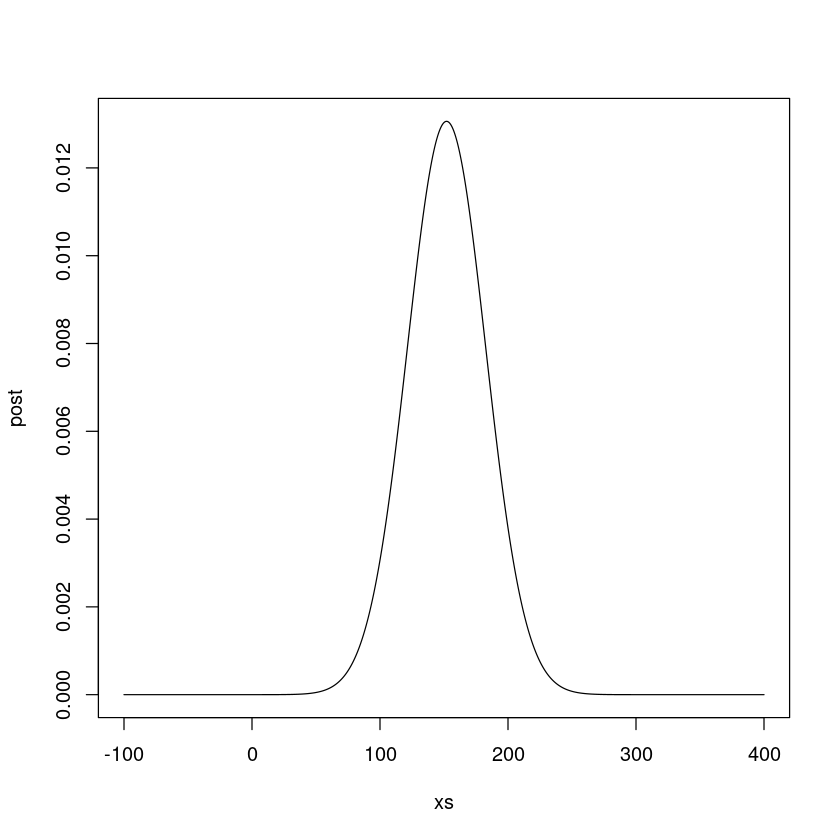

In [30]:
xs <- seq(from = -100, to = 400, by = 0.001)
post <- dnorm(xs, m_d, sd = s_d)
plot(xs, post, "l")

In [32]:
cat(qnorm(0.025, m_d, sd = s_d), qnorm(0.975, m_d, sd = s_d))

92.1328 211.8672

In [34]:
z <- (0 - m_d)/s_d
cat(z)

-4.976257

In [35]:
pnorm(z, 0, 1)

[1] 3.241285e-07

### Smoking habits in students

22 males out of 100

31 females out of 100

In [36]:
# We assume Beta priors Beta(1,2) both for males and females
alpha <- 1
beta <- 2

mean <- alpha / (alpha + beta)
var <- alpha*beta / ((alpha + beta)^2 * (alpha + beta + 1))
sd <- sqrt(var)

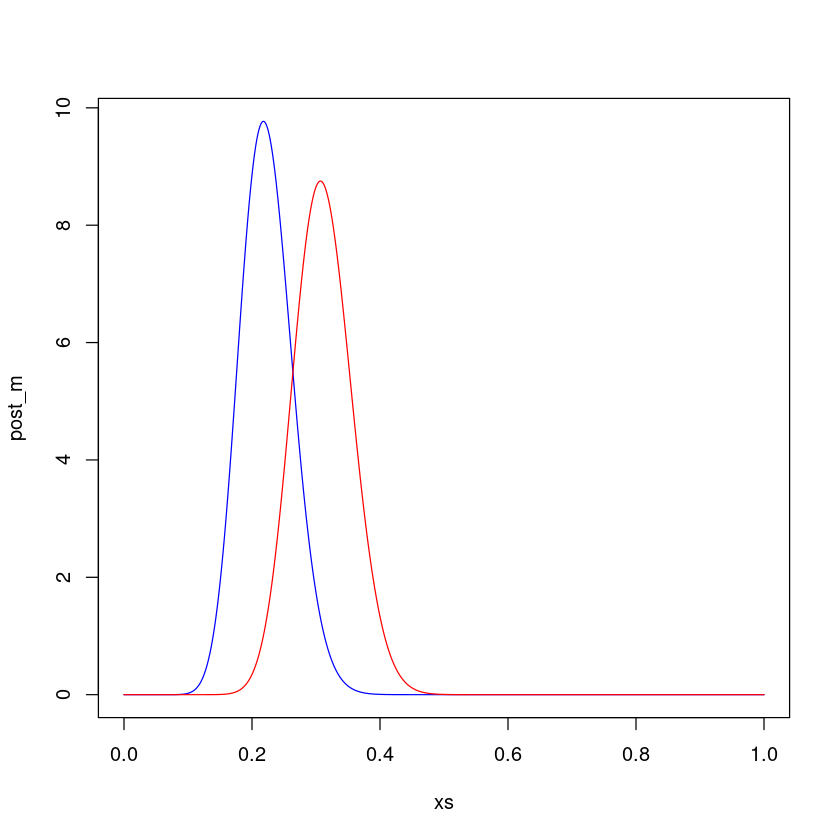

In [40]:
# Posterior? Beta(alpha + r, beta + n - r)
n <- 100
r_male <- 22
r_female <- 31

alpha_m <- alpha + r_male
beta_m <- beta + n - r_male

alpha_f <- alpha + r_female
beta_f <- beta + n - r_female

xs <- seq(from = 0, to = 1, by = 0.001)
post_m <- dbeta(xs, alpha_m, beta_m)
post_f <- dbeta(xs, alpha_f, beta_f)
plot(xs, post_m, "l", col = "blue")
lines(xs, post_f, col = "red")

In [42]:
#Evaluate mean and variance for both (gaussian approximation)
mean_post <- function(a,b){
    a / (a + b)
}

sd_post <- function(a, b){
    sqrt(a*b/((a + b)^2 * (a + b + 1)))
}

mean_m <- mean_post(alpha_m, beta_m)
sd_m <- sd_post(alpha_m, beta_m)

mean_f <- mean_post(alpha_f, beta_f)
sd_f <- sd_post(alpha_f, beta_f)

cat("M: ", mean_m, sd_m)
cat("\nF: ", mean_f, sd_f)

M:  0.223301 0.04083711
F:  0.3106796 0.04537851

-0.03227358 0.2070309

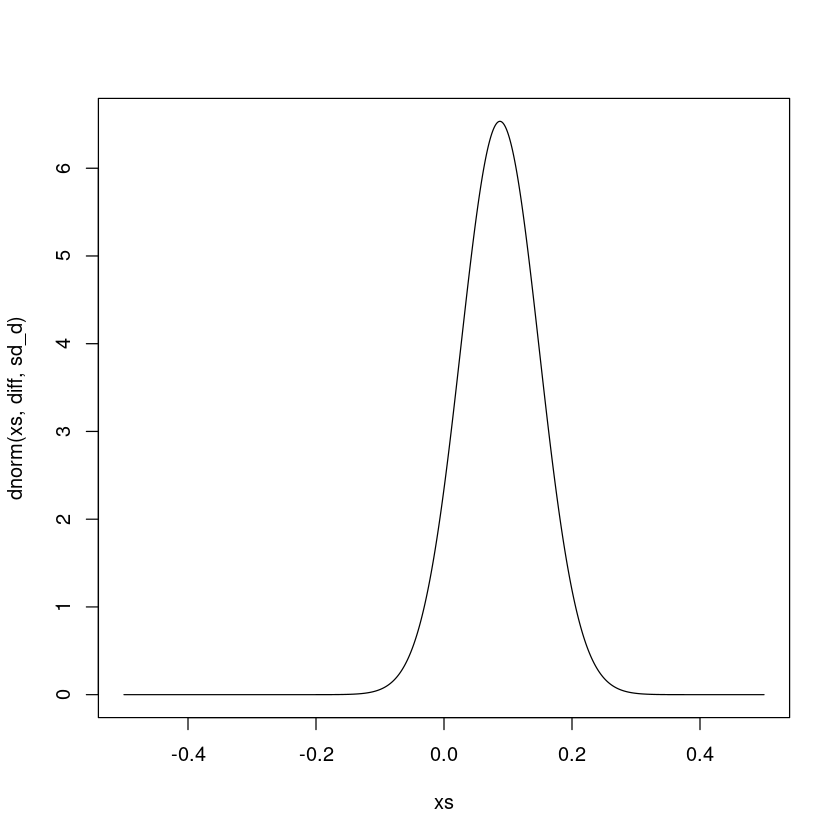

In [50]:
#Evaluate difference and confidence interval
diff <- mean_f - mean_m
sd_d <- sqrt(sd_m^2 + sd_f^2)

xs <- seq(from = -0.5, to = 0.5, by = .001)
plot(xs, dnorm(xs, diff, sd_d), "l" )

#CI
cat(qnorm(0.025, diff, sd_d), qnorm(0.975, diff, sd_d))

#### Zero lies inside the credibility interval --> we don't reject the null hypothesis $\pi_m = \pi_f$.